# k-Means clustering example: mall customer segmentation
### Adopted from https://github.com/sametgirgin/Machine-Learning-Clustering-Models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/scsu-data-science/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# iterate over the columns, replacing zeros with column mean
for col in columns:
    df[col] = df[col].replace(0, np.NaN)
    mean = df[col].mean()
    df[col] = df[col].replace(np.NaN, mean)
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# Create clusters based on annual income and speding score

In [ ]:
X =  df.loc[:, 'Pregnancies':'Age'].values

# Apply k-Means using K = 1-10 clusters, and save the within cluster sum of squares, wcss (error)

In [ ]:
wcss = []
for k in range(1,11): 
     kmeans = KMeans(n_clusters = k, random_state = 0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

# Elbow plot to determine good choice of k

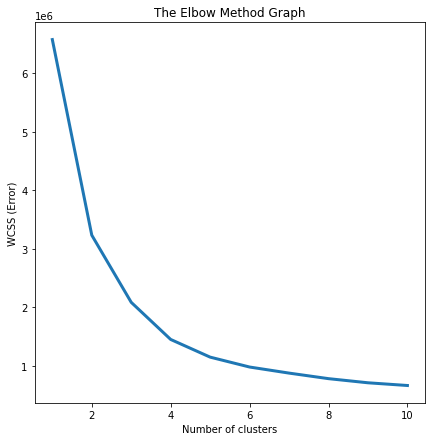

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# Plot the clusters

TypeError: ignored

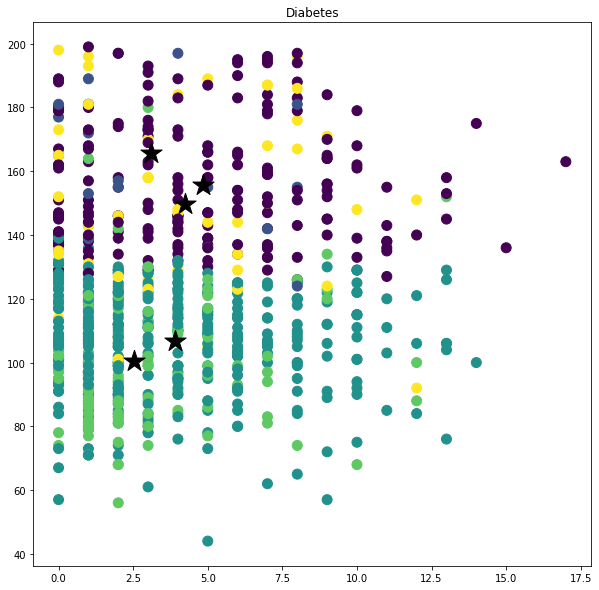

In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title("Diabetes")
plt.xlabel()
plt.ylabel()
plt.show()

# Perform the same analysis using age and spending score instead

In [ ]:
X = df.loc[:, ['Glucose','Insulin','Age']].values

In [ ]:
wcss = []
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

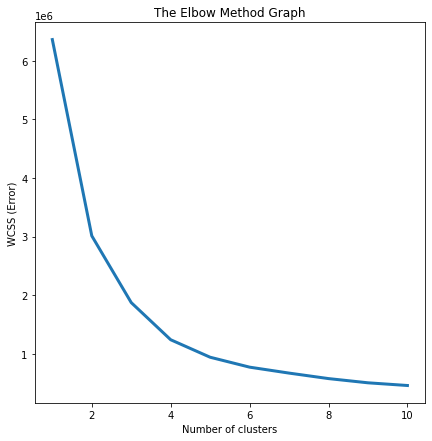

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth=3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# 4 clusters are appropriate in this case


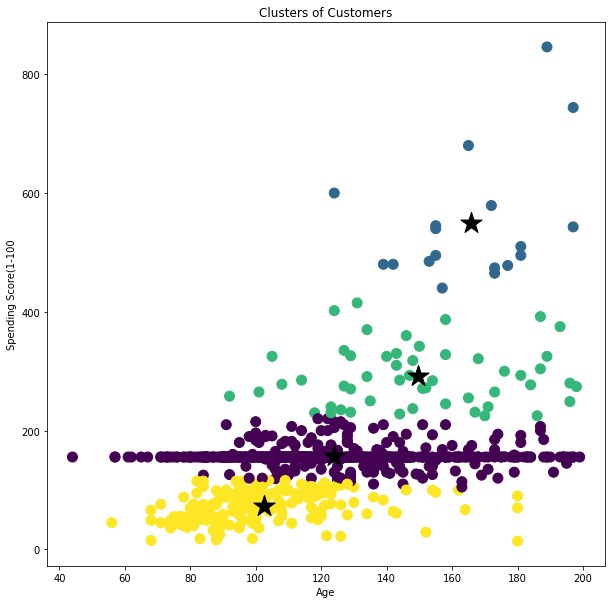

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=0 )
y_kmeans = kmeans.fit_predict(X)

plt.rcParams["figure.figsize"] = (10,10)
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s = 500, 
            c = 'black',
            marker ='*')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100')
plt.show()